## 数据分析

### 1.对于订单量进行分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_sales = pd.read_csv('./data/sku_sales.csv')
data_sales['order_time'] = pd.to_datetime(data_sales['order_time']).dt.date
data_sales.rename(columns={'order_time': 'date'}, inplace=True)
data_sales.head()

,order_id,store_id,sku_id,date,quantity,channel
0,202108310100005,1,317,2021-08-31,1.0,2
1,202108310100023,1,317,2021-08-31,2.0,2
2,202204260100049,1,317,2022-04-26,2.0,2
3,202207040100048,1,317,2022-07-04,2.0,2
4,202207060100029,1,317,2022-07-06,1.0,2


In [5]:
# 按照store_id, sku_id, sku_id, channel分组，计算quantity的和
data_sales = data_sales.groupby(['store_id', 'sku_id', 'channel', 'date'])['quantity'].sum().reset_index()
data_sales.head()

,store_id,sku_id,channel,date,quantity
0,1,1,1,2022-06-17,1.0
1,1,1,1,2022-06-18,4.0
2,1,1,1,2022-06-19,1.0
3,1,1,1,2022-06-24,1.0
4,1,1,1,2022-06-26,1.0


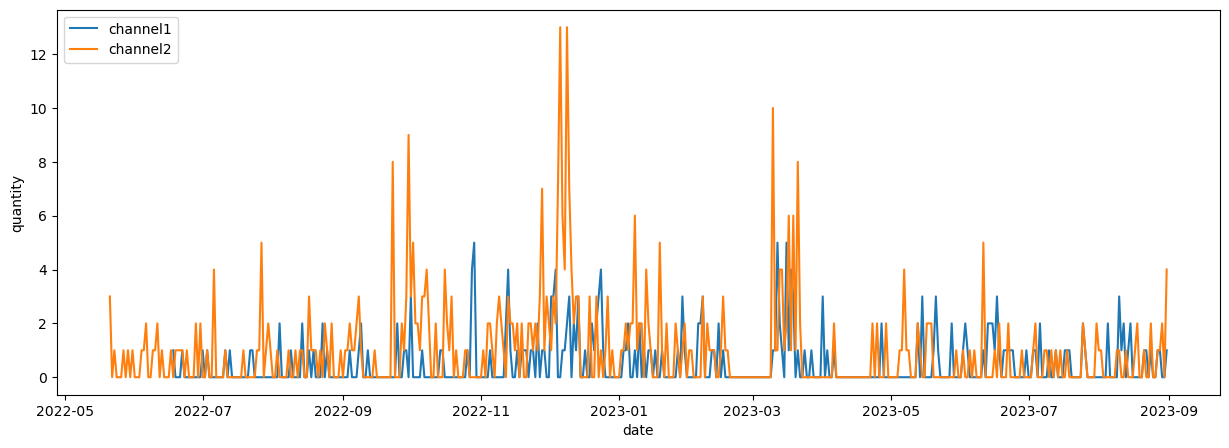

In [5]:
# 画出两个图，分别是store_id=1, sku_id=1, channel=1的销量和store_id=1, sku_id=1, channel=2的销量
# 选取store_id=1, sku_id=1, channel=1的数据
df1 = data_sales[(data_sales['store_id'] == 3) & (data_sales['sku_id'] == 1) & (data_sales['channel'] == 1)]
# 选取store_id=1, sku_id=1, channel=2的数据
df2 = data_sales[(data_sales['store_id'] == 3) & (data_sales['sku_id'] == 1) & (data_sales['channel'] == 2)]
# 两张图在同一个画布上画出，对于没有数据的日期，用0填充
# 生成一个包含df1, df2所有日期的dataframe
df1 = df1.set_index('date')
df2 = df2.set_index('date')
df1 = df1.reindex(pd.date_range(start=df1.index.min(), end=df1.index.max()))
df2 = df2.reindex(pd.date_range(start=df2.index.min(), end=df2.index.max()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)
# 画图
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.plot(df1.index, df1['quantity'], label='channel1')
ax1.plot(df2.index, df2['quantity'], label='channel2')
ax1.set_ylabel('quantity')
ax1.set_xlabel('date')
plt.legend(loc='upper left')
plt.show()


### 2. 对商品信息进行分析

In [14]:
data_sku_info = pd.read_csv('./data/sku_info.csv')
data_sku_info.head()

,sku_id,item_first_cate_cd,item_second_cate_cd,item_third_cate_cd,brand_code
0,1,1,1,1,1
1,2,1,1,1,2
2,3,1,1,1,2
3,4,1,1,2,3
4,5,1,1,2,4


In [16]:
print("item_first_cate_cd:", data_sku_info['item_first_cate_cd'].unique())
print("item_second_cate_cd:", data_sku_info['item_second_cate_cd'].unique())
print("item_third_cate_cd:", data_sku_info['item_third_cate_cd'].unique())
print("brand_code:", data_sku_info['brand_code'].unique())

item_first_cate_cd: [1 2]
item_second_cate_cd: [1 2 3 4 5 6 7]
item_third_cate_cd: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
brand_code: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126]


<BarContainer object of 2 artists>

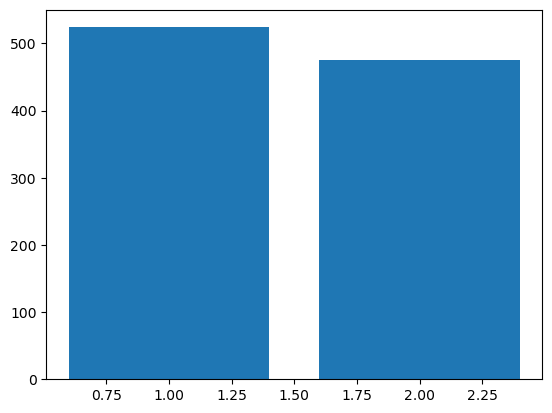

In [17]:
# 画出item_first_cate_cd=1和2的商品数量
temp = data_sku_info.groupby('item_first_cate_cd')['sku_id'].count().reset_index()
plt.bar(temp['item_first_cate_cd'], temp['sku_id'])

<BarContainer object of 126 artists>

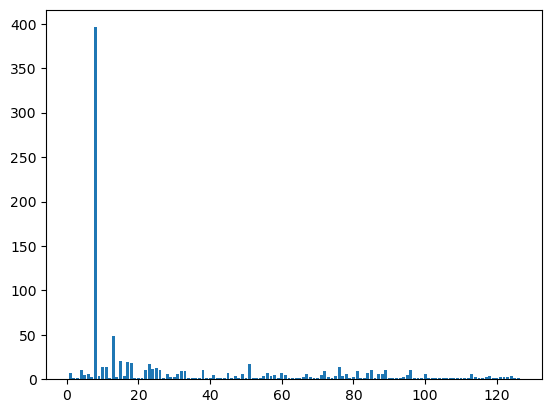

In [18]:
# 画出每一种brand_code的商品数量
temp = data_sku_info.groupby('brand_code')['sku_id'].count().reset_index()
temp = temp.sort_values(by='sku_id', ascending=False)
plt.bar(temp['brand_code'], temp['sku_id'])

In [19]:
# 对商品进行one-hot编码
data_sku_info = pd.get_dummies(data_sku_info, columns=['item_first_cate_cd', 'item_second_cate_cd', 'item_third_cate_cd', 'brand_code'])
data_sku_info.head()

,sku_id,item_first_cate_cd_1,item_first_cate_cd_2,item_second_cate_cd_1,item_second_cate_cd_2,item_second_cate_cd_3,item_second_cate_cd_4,item_second_cate_cd_5,item_second_cate_cd_6,item_second_cate_cd_7,...,brand_code_117,brand_code_118,brand_code_119,brand_code_120,brand_code_121,brand_code_122,brand_code_123,brand_code_124,brand_code_125,brand_code_126
0,1,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3. 分析价格表

In [25]:
data_price = pd.read_csv('./data/sku_price_and_status.csv')
data_price['date'] = pd.to_datetime(data_price['date']).dt.date
data_price.head()

,store_id,sku_id,date,salable_status,stock_status,original_price
0,6,1,2022-06-16,1,1,25.48
1,6,1,2023-04-08,1,1,25.48
2,6,1,2021-10-07,0,1,25.48
3,6,1,2021-12-25,0,1,25.48
4,6,1,2022-12-02,1,1,25.48


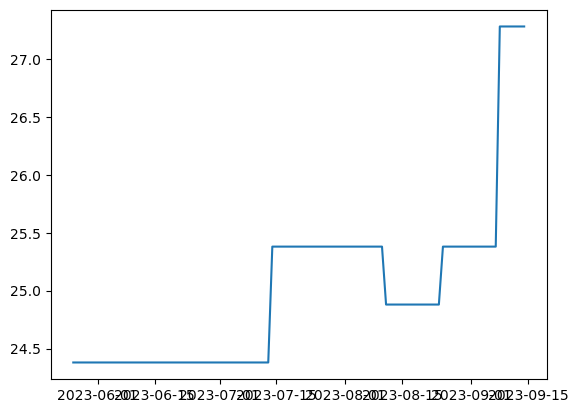

In [38]:
# 画出store_id=1, sku_id=1的价格变化
temp = data_price[(data_price['store_id'] == 1) & (data_price['sku_id'] == 200)]
temp = temp.set_index('date')
temp = temp.reindex(pd.date_range(start=temp.index.min(), end=temp.index.max()))
temp = temp.fillna(0)
plt.plot(temp.index, temp['original_price'])
plt.show()

<BarContainer object of 3 artists>

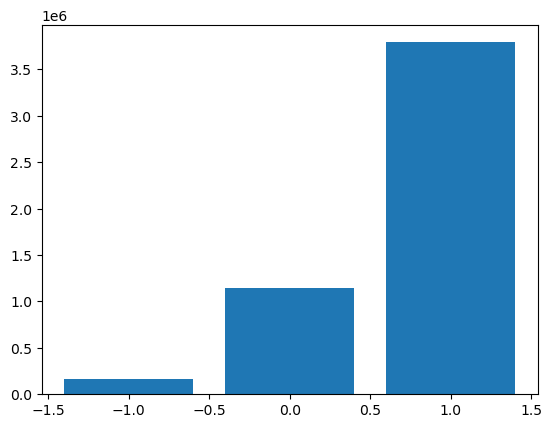

In [39]:
# 统计salable_status=0/1的数量
temp = data_price.groupby('salable_status')['sku_id'].count().reset_index()
plt.bar(temp['salable_status'], temp['sku_id'])

<BarContainer object of 3 artists>

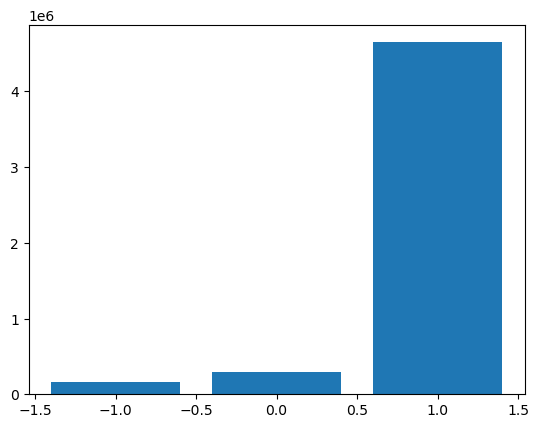

In [40]:
# 统计stock_status=0/1的数量
temp = data_price.groupby('stock_status')['sku_id'].count().reset_index()
plt.bar(temp['stock_status'], temp['sku_id'])

### 4. 分析产品促销信息表

In [41]:
data_prom = pd.read_csv('./data/sku_prom.csv')
data_prom['date'] = pd.to_datetime(data_prom['date']).dt.date
data_prom.head()

,store_id,sku_id,date,promotion_id,curr_day,total_days,promotion_type,threshold,discount_off,channel
0,6,1,2022-05-27,1,1,14,1,1.51,0.16,1
1,6,1,2022-05-27,1,1,14,1,1.51,0.16,2
2,6,1,2022-05-28,1,2,14,1,1.51,0.16,2
3,6,1,2022-05-28,1,2,14,1,1.51,0.16,1
4,6,1,2022-05-29,1,3,14,1,1.51,0.16,1


In [46]:
print("promotion_id:", data_prom['promotion_id'].unique().shape[0])
print("promotion_type:", data_prom['promotion_type'].unique())
print("discount_off:", data_prom['discount_off'].unique())
print("threshold:", data_prom['threshold'].unique().min(), data_prom['threshold'].unique().max())

promotion_id: 109631
promotion_type: [1 2 3 4 5 6 7]
discount_off: [0.16 0.15 0.19 0.17 0.18 0.14 0.2  0.11 0.25 0.24 0.22 0.21 0.23 0.29
 0.28 0.3  0.26 0.27 0.12 0.13 0.1  0.33 0.34 0.5  0.4  0.52 0.67 0.39
 0.49 0.58 0.61 0.32 0.43 0.44 0.51 0.56 0.66 0.31 0.38 0.46 0.37 0.6
 0.69 0.62 0.41 0.71 0.45 0.35 0.42 0.48 0.36 0.47 0.64 0.65 0.57 0.55
 0.54 0.53 0.59 0.75 0.72 0.74 0.7  0.78 0.63 0.76 0.68 0.73 0.79 0.77]
threshold: 1.0 27.6


### 5.分析商店天气表

In [2]:
data_weather = pd.read_csv('./data/store_weather.csv')
data_weather['date'] = pd.to_datetime(data_weather['date']).dt.date
data_weather.head()

,store_id,date,weather_type,min_temperature,max_temperature
0,3,2022-01-30,14,0.20,0.31
1,3,2022-04-13,1,0.36,0.60
2,3,2022-07-17,0,0.67,0.91
3,3,2022-08-23,7,0.64,0.76
4,3,2022-12-17,1,0.05,0.22


In [4]:
print("weather type:", data_weather['weather_type'].unique().max())

weather type: 303


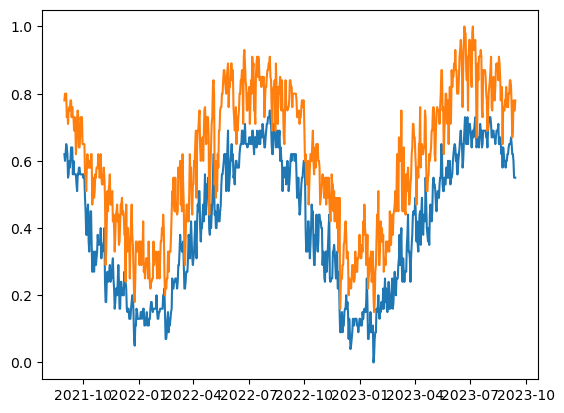

In [48]:
# 查看store_id=1的天气情况
temp = data_weather[data_weather['store_id'] == 1]
temp = temp.set_index('date')
temp = temp.reindex(pd.date_range(start=temp.index.min(), end=temp.index.max()))
temp = temp.fillna(0)
plt.plot(temp.index, temp['min_temperature'])
plt.plot(temp.index, temp['max_temperature'])
plt.show()

### 6.联合分析

#### 6.1 促销对销量的影响

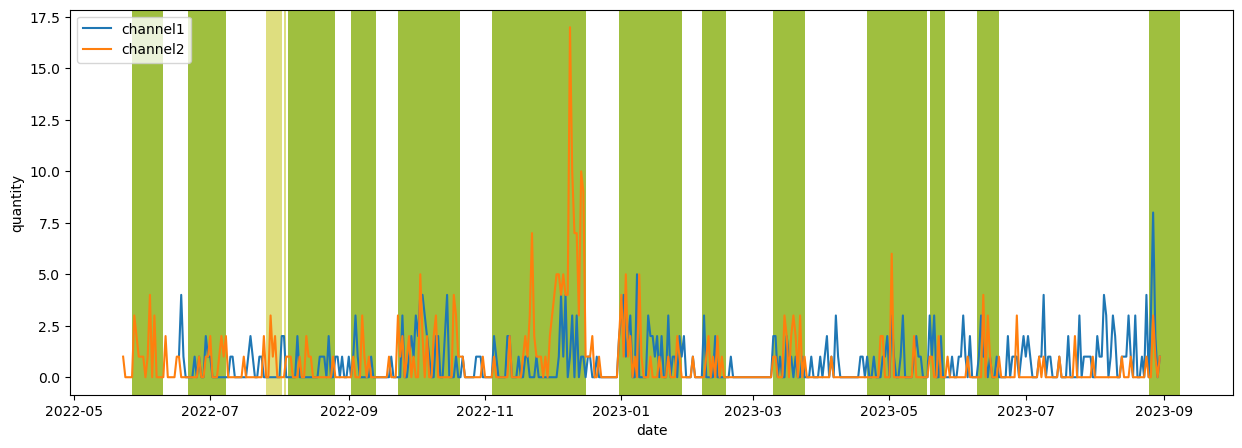

In [73]:
# 查看促销对销量的影响
# 选取store_id=1, sku_id=1的数据，注意channel=1和channel=2的数据
df1 = data_sales[(data_sales['store_id'] == 1) & (data_sales['sku_id'] == 1) & (data_sales['channel'] == 1)]
df2 = data_sales[(data_sales['store_id'] == 1) & (data_sales['sku_id'] == 1) & (data_sales['channel'] == 2)]
df1 = df1.set_index('date')
df2 = df2.set_index('date')
df1 = df1.reindex(pd.date_range(start=df1.index.min(), end=df1.index.max()))
df2 = df2.reindex(pd.date_range(start=df2.index.min(), end=df2.index.max()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)
# 选取store_id=1, sku_id=1的价格数据
temp = data_price[(data_price['store_id'] == 1) & (data_price['sku_id'] == 1)]
temp = temp.set_index('date')
temp = temp.reindex(pd.date_range(start=temp.index.min(), end=temp.index.max()))
temp = temp.fillna(0)
# 选取store_id=1, sku_id=1的促销数据，注意channel=1和channel=2的数据，且可能包括不同的促销信息，date无法作为index
temp_prom1 = data_prom[(data_prom['store_id'] == 1) & (data_prom['sku_id'] == 1) & (data_prom['channel'] == 1)]
temp_prom2 = data_prom[(data_prom['store_id'] == 1) & (data_prom['sku_id'] == 1) & (data_prom['channel'] == 2)]
# 将每一个date对应的促销信息合并成列表
temp_prom1 = temp_prom1.groupby('date')['discount_off'].apply(list).reset_index()
temp_prom2 = temp_prom2.groupby('date')['discount_off'].apply(list).reset_index()
# 设置index
temp_prom1 = temp_prom1.set_index('date')
temp_prom2 = temp_prom2.set_index('date')
# 画图
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.plot(df1.index, df1['quantity'], label='channel1')
ax1.plot(df2.index, df2['quantity'], label='channel2')
ax1.set_ylabel('quantity')
ax1.set_xlabel('date')
# 给促销的点写出促销类型
for i in range(temp_prom1.shape[0]):
    ax1.axvspan(temp_prom1.index[i], temp_prom1.index[i] + pd.Timedelta(days=1), facecolor='g', alpha=0.5)
for i in range(temp_prom2.shape[0]):
    ax1.axvspan(temp_prom2.index[i], temp_prom2.index[i] + pd.Timedelta(days=1), facecolor='y', alpha=0.5)
plt.legend(loc='upper left')
plt.show()


In [72]:
temp_prom1['discount_off'].apply(str).unique()

array(['[0.16]', '[0.15]', '[0.2]', '[0.23]', '[0.25]', '[0.39]',
       '[0.35]', '[0.18]', '[0.2, 0.2]'], dtype=object)

In [74]:
temp_prom2['discount_off'].apply(str).unique()

array(['[0.16]', '[0.15]', '[0.23]', '[0.2]', '[0.27, 0.23]', '[0.25]',
       '[0.39]', '[0.35]', '[0.18]', '[0.2, 0.2]'], dtype=object)

**可以发现促销对商品的影响是较为显著的，促销越大需求越大**

#### 6.2 天气对销量的影响

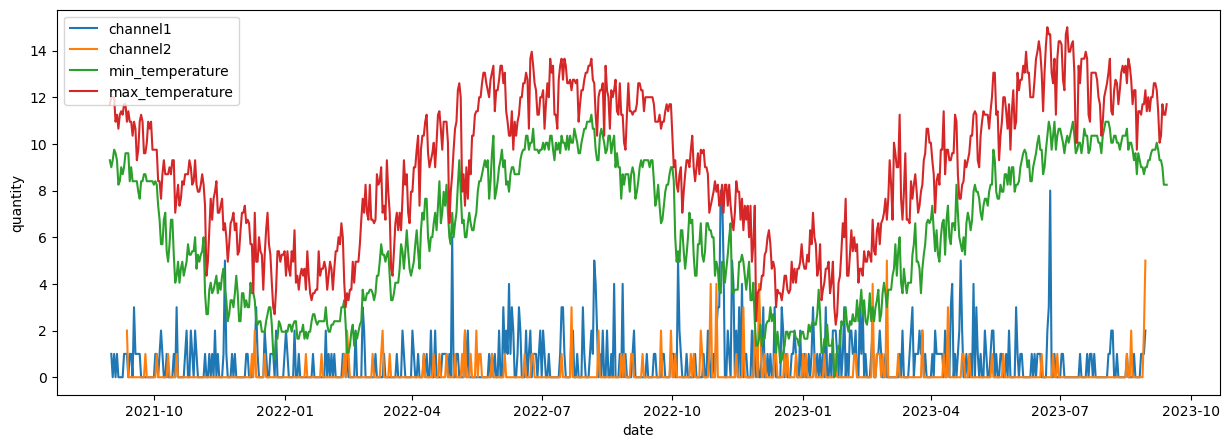

In [78]:
# 查看天气对销量的影响
# 选取store_id=1, sku_id=1的数据，注意channel=1和channel=2的数据
df1 = data_sales[(data_sales['store_id'] == 1) & (data_sales['sku_id'] == 400) & (data_sales['channel'] == 1)]
df2 = data_sales[(data_sales['store_id'] == 1) & (data_sales['sku_id'] == 400) & (data_sales['channel'] == 2)]
df1 = df1.set_index('date')
df2 = df2.set_index('date')
df1 = df1.reindex(pd.date_range(start=df1.index.min(), end=df1.index.max()))
df2 = df2.reindex(pd.date_range(start=df2.index.min(), end=df2.index.max()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)
# 选取store_id=1, sku_id=1的天气数据
temp = data_weather[(data_weather['store_id'] == 1)]
temp = temp.set_index('date')
temp = temp.reindex(pd.date_range(start=temp.index.min(), end=temp.index.max()))
temp = temp.fillna(0)
# 画图
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.plot(df1.index, df1['quantity'], label='channel1')
ax1.plot(df2.index, df2['quantity'], label='channel2')
ax1.set_ylabel('quantity')
ax1.set_xlabel('date')
# 画出每天的最高温度和最低温度
ax1.plot(temp.index, temp['min_temperature']*15, label='min_temperature')
ax1.plot(temp.index, temp['max_temperature']*15, label='max_temperature')
plt.legend(loc='upper left')
plt.show()

**部分商品与天气无关**

#### 6.3 价格对销量的影响

Text(0, 0.5, 'quantity')

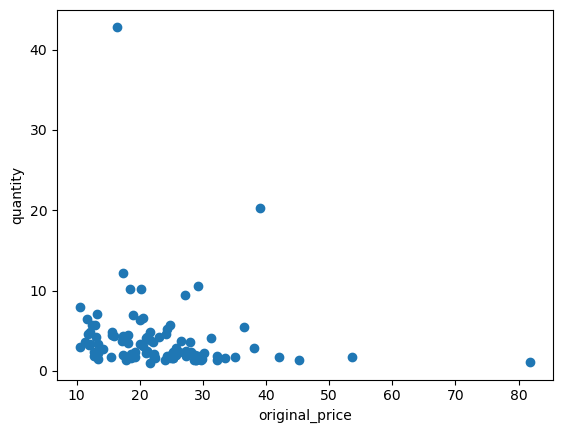

In [86]:
# 计算store_id=1的所有sku的平均销量
temp = data_sales[data_sales['store_id'] == 1]
temp = temp.groupby('sku_id')['quantity'].mean().reset_index()
temp = temp.sort_values(by='quantity', ascending=False)
# 计算store_id=1的所有sku的平均价格
temp_price = data_price[data_price['store_id'] == 1]
temp_price = temp_price.groupby('sku_id')['original_price'].mean().reset_index()
temp_price = temp_price.sort_values(by='original_price', ascending=False)
# sku从1-100，没有的sku用0填充
temp = temp.set_index('sku_id')
temp = temp.reindex(range(1, 101))
temp = temp.fillna(0)
temp_price = temp_price.set_index('sku_id')
temp_price = temp_price.reindex(range(1, 101))
temp_price = temp_price.fillna(0)
# 画销量关于价格的散点图

plt.xlabel('original_price')
plt.ylabel('quantity')

**价格对销量没有太大的影响**

#### 6.4 检测订单购买中可能会存在绑定情况

In [89]:
data_sales_origin = pd.read_csv('./data/sku_sales.csv')
data_sales_origin['order_time'] = pd.to_datetime(data_sales_origin['order_time']).dt.date
data_sales_origin.rename(columns={'order_time': 'date'}, inplace=True)
data_sales_origin.head()

,order_id,store_id,sku_id,date,quantity,channel
0,202108310100005,1,317,2021-08-31,1.0,2
1,202108310100023,1,317,2021-08-31,2.0,2
2,202204260100049,1,317,2022-04-26,2.0,2
3,202207040100048,1,317,2022-07-04,2.0,2
4,202207060100029,1,317,2022-07-06,1.0,2


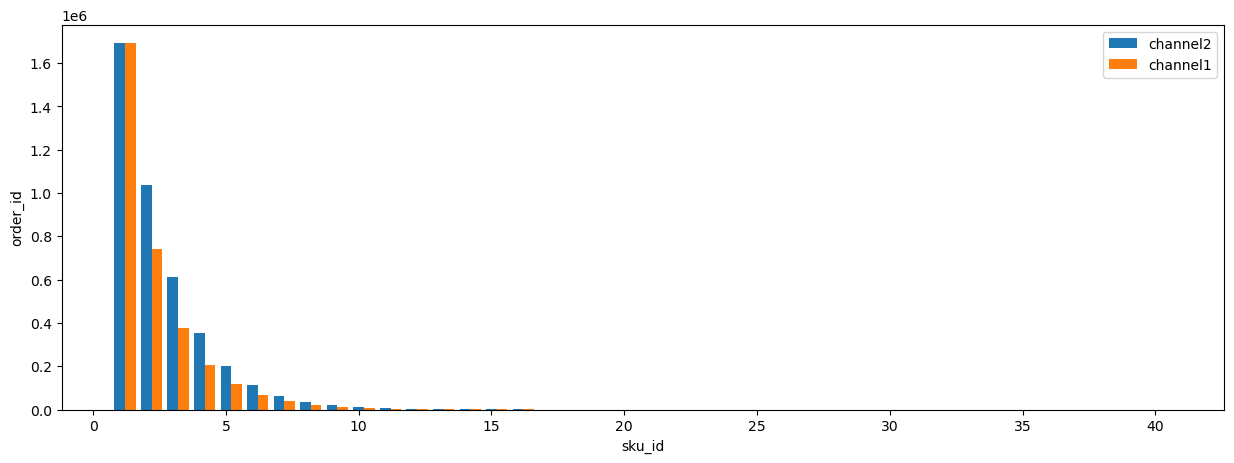

In [100]:
# 按照order_id分组，查看sku的数量，即每个订单购买了多少种商品，分开channel=1和channel=2
temp = data_sales_origin.groupby(['order_id', 'channel'])['sku_id'].count().reset_index()
temp1 = temp[temp['channel'] == 1]
temp2 = temp[temp['channel'] == 2]
# 统计channel=1和channel=2的购买商品数分布
temp1 = temp1.groupby('sku_id')['order_id'].count().reset_index()
temp2 = temp2.groupby('sku_id')['order_id'].count().reset_index()
# 画出channel=1和channel=2的分布(两个柱分开在同一个图上画出)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.bar(temp2['sku_id'], temp2['order_id'], width=0.4, label='channel2')
ax1.bar(temp1['sku_id']+0.4, temp1['order_id'], width=0.4, label='channel1')
ax1.set_ylabel('order_id')
ax1.set_xlabel('sku_id')
plt.legend(loc='upper right')
plt.show()

In [104]:
# 查看买了多个商品的订单中，分别买的是哪些商品
# 选取store_id=1的数据
temp = data_sales_origin[data_sales_origin['store_id'] == 1]
# 按照order_id分组，查看sku_id的列表
temp = temp.groupby('order_id')['sku_id'].apply(list).apply(str).reset_index()
temp

,order_id,sku_id
0,202108310100001,[259]
1,202108310100002,"[190, 132]"
2,202108310100003,"[519, 190]"
3,202108310100004,"[281, 486]"
4,202108310100005,[317]
...,...,...
546249,202308310100894,[620]
546250,202308310100895,"[11, 383]"
546251,202308310100896,"[20, 192, 133, 563, 398, 618, 321]"
546252,202308310100897,[481]


In [110]:
# 去除只包含一个商品的订单
temp = temp[temp['sku_id'].apply(lambda x: len(x.split(','))) > 1]

In [112]:
# 合并购买的商品占比
(temp['sku_id'].shape[0] - temp['sku_id'].unique().shape[0]) / temp['sku_id'].shape[0]

0.2868149856898769

#### 6.5 分周统计销量

In [7]:
data_sales_nochannel = data_sales.groupby(['store_id', 'sku_id', 'date'])['quantity'].sum().reset_index()
data_sales_nochannel.head()

,store_id,sku_id,date,quantity
0,1,1,2022-05-23,1.0
1,1,1,2022-05-28,3.0
2,1,1,2022-05-29,2.0
3,1,1,2022-05-30,1.0
4,1,1,2022-05-31,1.0


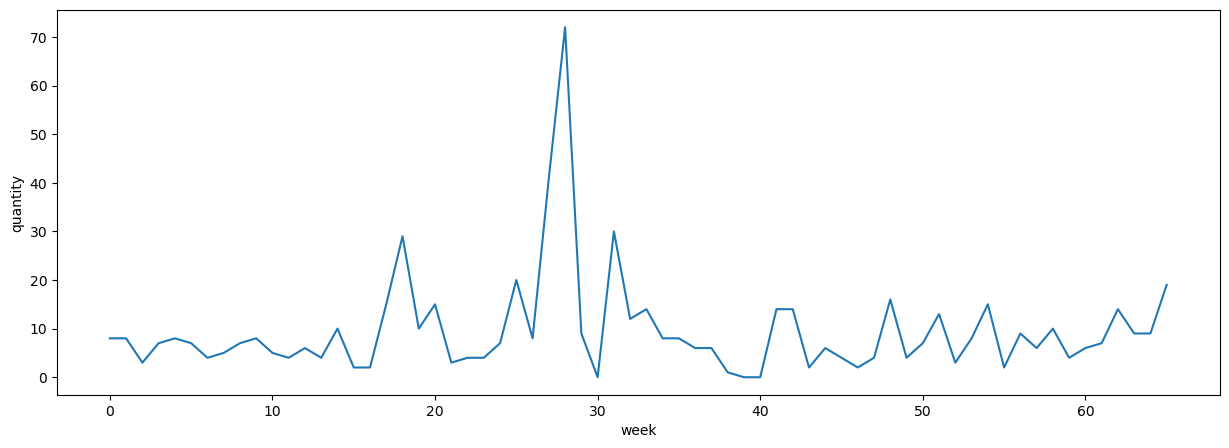

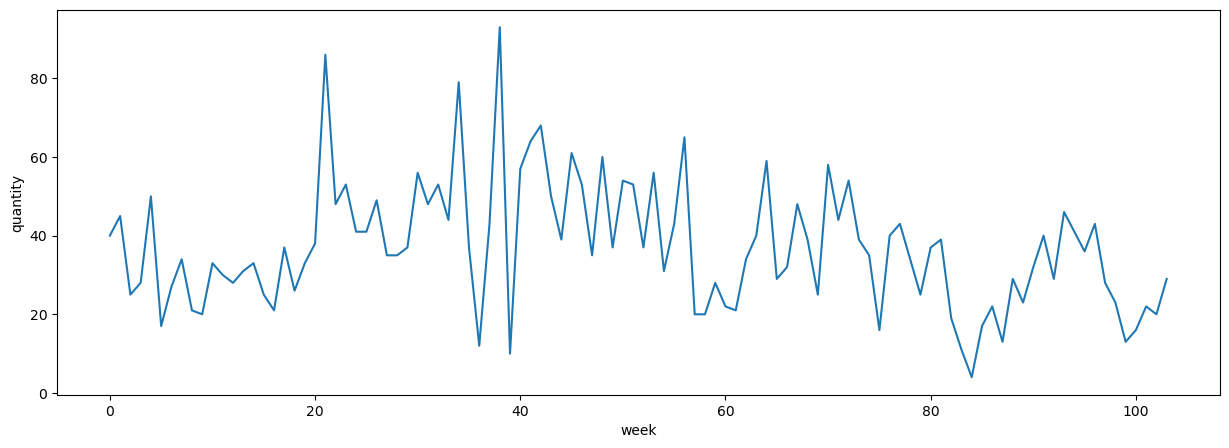

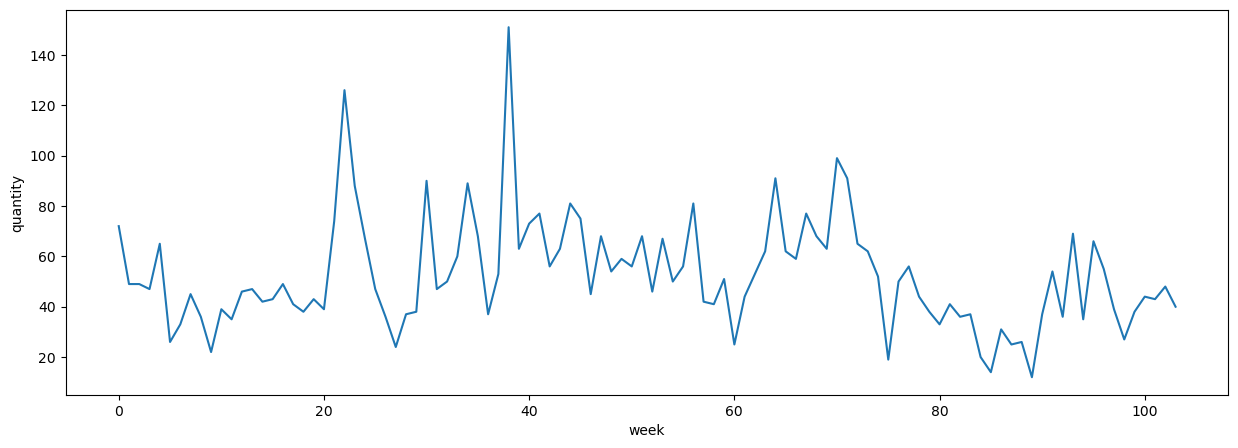

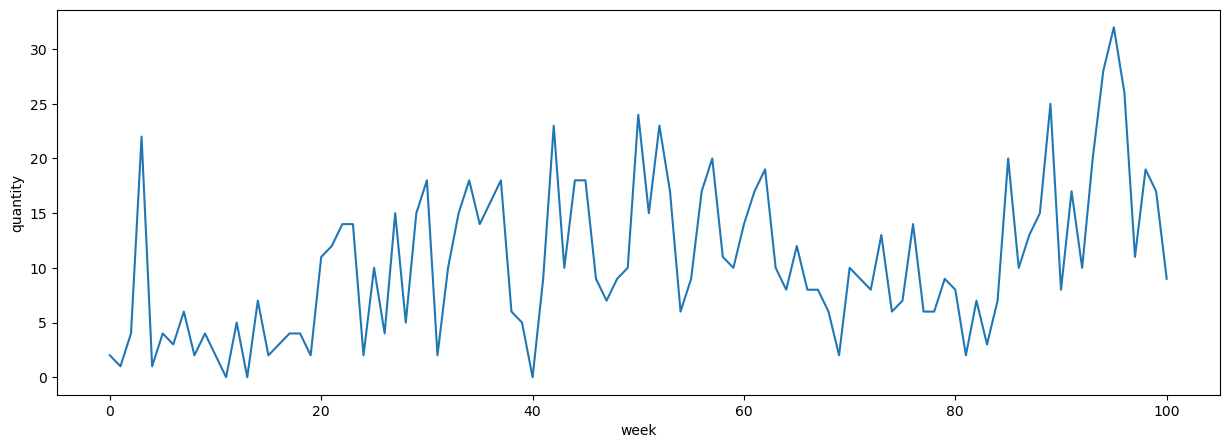

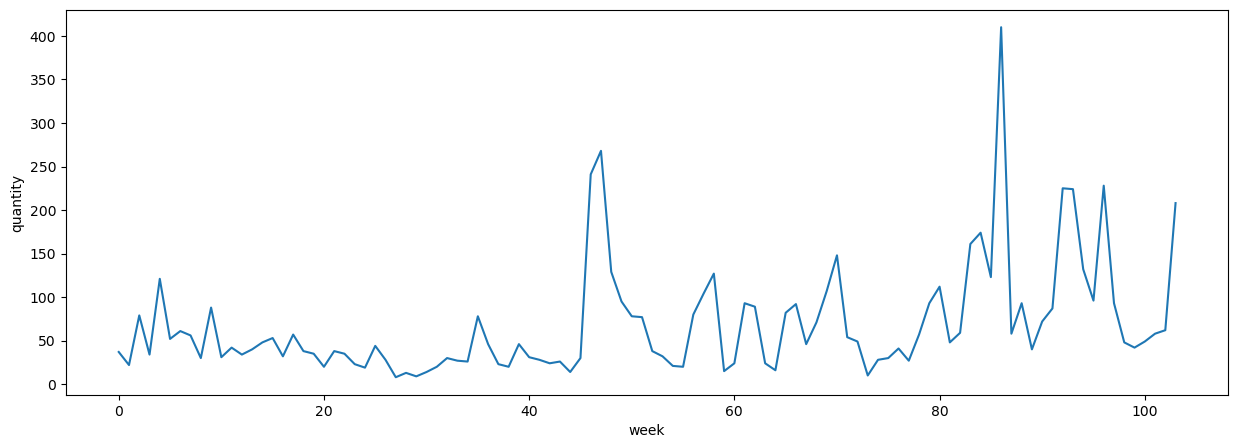

In [41]:
# 对于每个store, sku进行周统计
def get_week_analysis(data_sales, store_id, sku_id):
    data_sales_pick = data_sales[(data_sales['store_id'] == store_id) & (data_sales['sku_id'] == sku_id)]
    data_sales_pick = data_sales_pick.drop(['store_id', 'sku_id'], axis=1)
    # 生成从最小日期到2023-08-31的dataframe
    data_sales_pick = data_sales_pick.set_index('date')
    data_sales_pick = data_sales_pick.reindex(pd.date_range(start=data_sales_pick.index.min(), end='2023-08-31'))
    data_sales_pick = data_sales_pick.fillna(0)
    # 从后往前按照周统计
    data_sales_pick = data_sales_pick.iloc[data_sales_pick.shape[0] - data_sales_pick.shape[0] // 7 * 7:]
    data_sales_pick = data_sales_pick.groupby(np.arange(len(data_sales_pick)) // 7).sum()
    # 画图
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(111)
    ax1.plot(data_sales_pick.index, data_sales_pick['quantity'])
    ax1.set_ylabel('quantity')
    ax1.set_xlabel('week')
    plt.show()

for i in range(1, 6):
    get_week_analysis(data_sales_nochannel, 1, i)

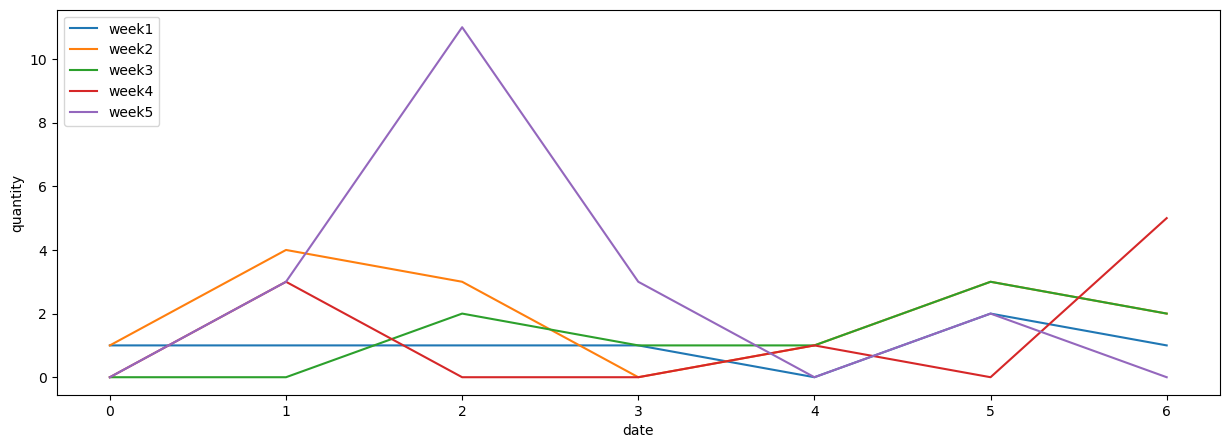

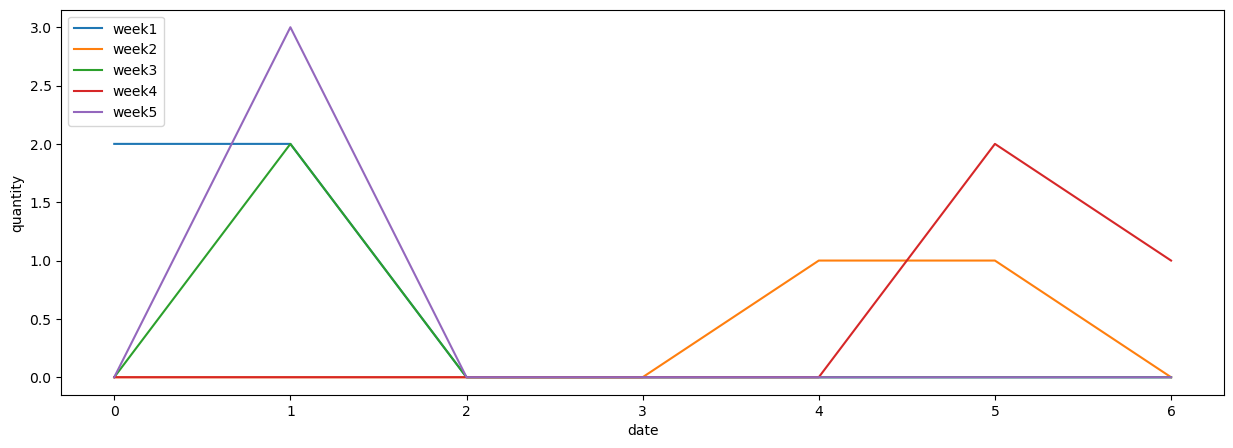

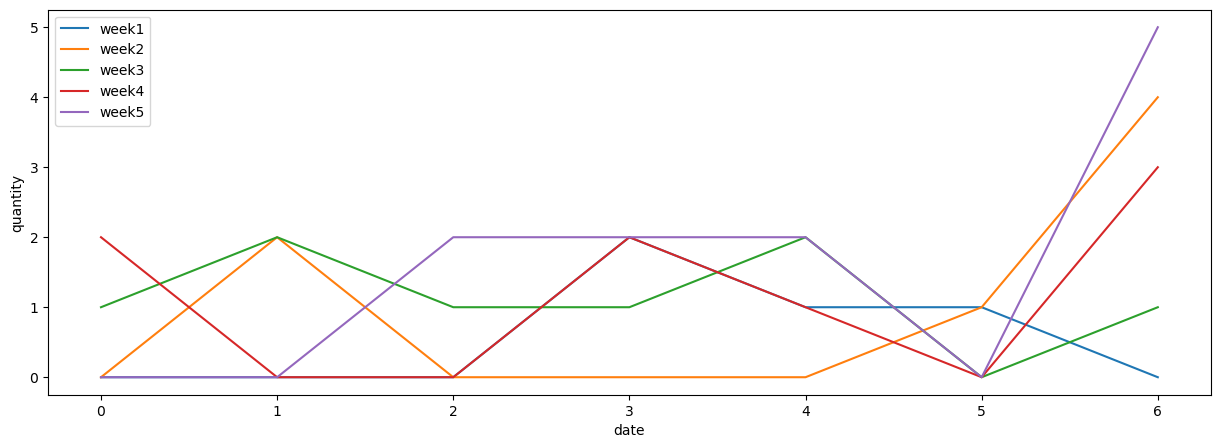

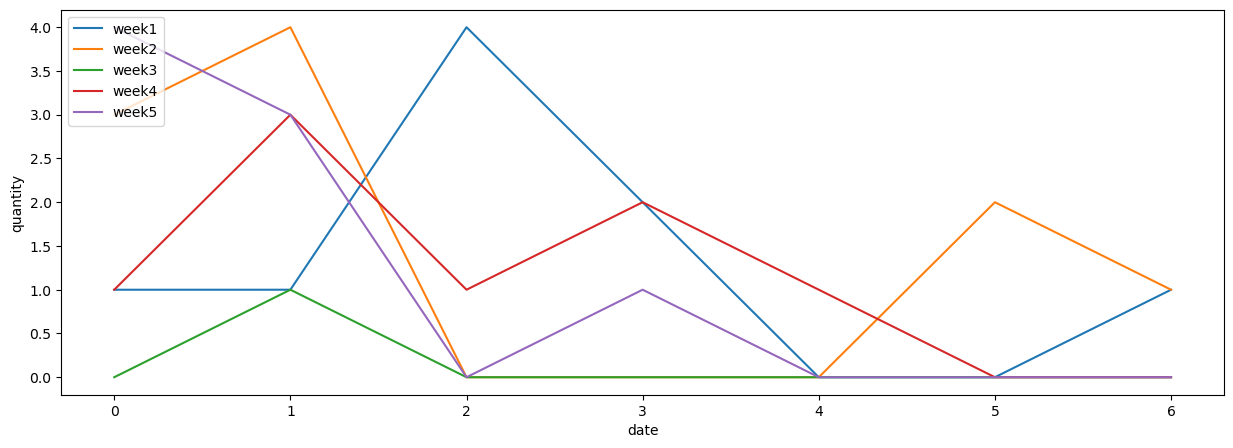

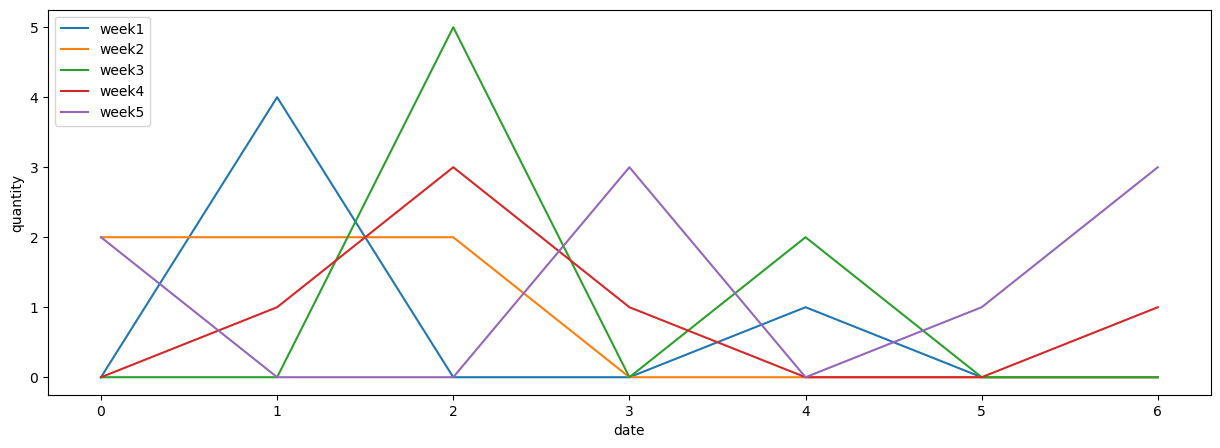

In [46]:
# 对于每个store, sku进行5周内统计
def get_inweek_analysis(data_sales, store_id, sku_id):
    data_pick = data_sales[(data_sales['store_id'] == store_id) & (data_sales['sku_id'] == sku_id)]
    data_pick = data_pick.drop(['store_id', 'sku_id'], axis=1)
    # 生成从最小日期到2023-08-31的dataframe
    data_pick = data_pick.set_index('date')
    data_pick = data_pick.reindex(pd.date_range(start=data_pick.index.min(), end='2023-08-31'))
    data_pick = data_pick.fillna(0)
    # 从后往前按照周统计
    data_pick = data_pick.iloc[data_pick.shape[0] - data_pick.shape[0] // 7 * 7:]
    data_pick = data_pick.iloc[-7 * 5:].reset_index()
    # 画图
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(111)
    for i in range(5):
        ax1.plot((data_pick.index[i*7:(i+1)*7]) % 7, data_pick['quantity'][i*7:(i+1)*7], label='week'+str(i+1))
    ax1.set_ylabel('quantity')
    ax1.set_xlabel('date')
    plt.legend(loc='upper left')
    plt.show()

for i in range(1, 6):
    get_inweek_analysis(data_sales_nochannel, i, 1)

**每个物品在不同商店销量可能不一样，这很有可能是因为那天商店并没有进行备货，而其他超市有备货**

**每个商店中每个物品的销量不一样，这也很正常**

<text style="color: red;">这说明销量在一定程度上可能误导模型！</text>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


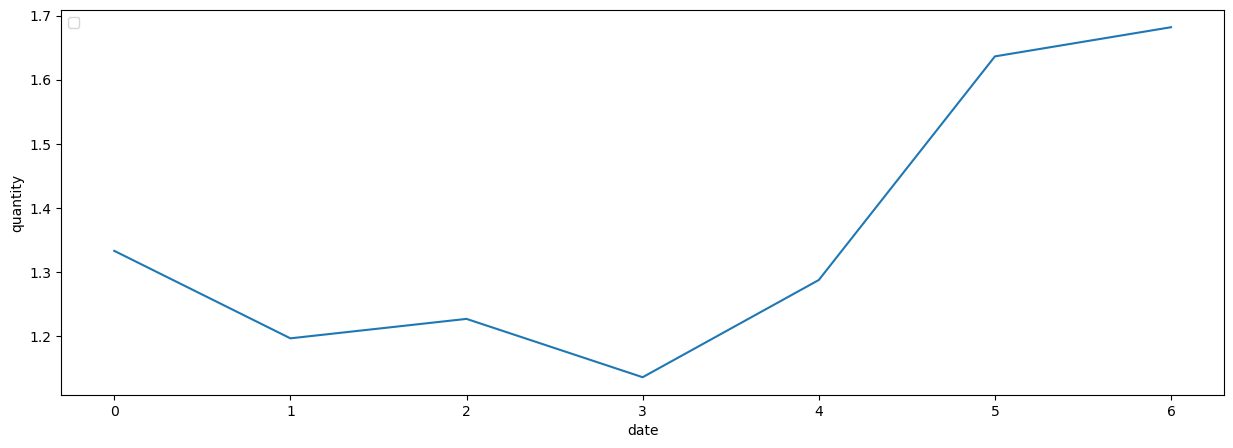

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


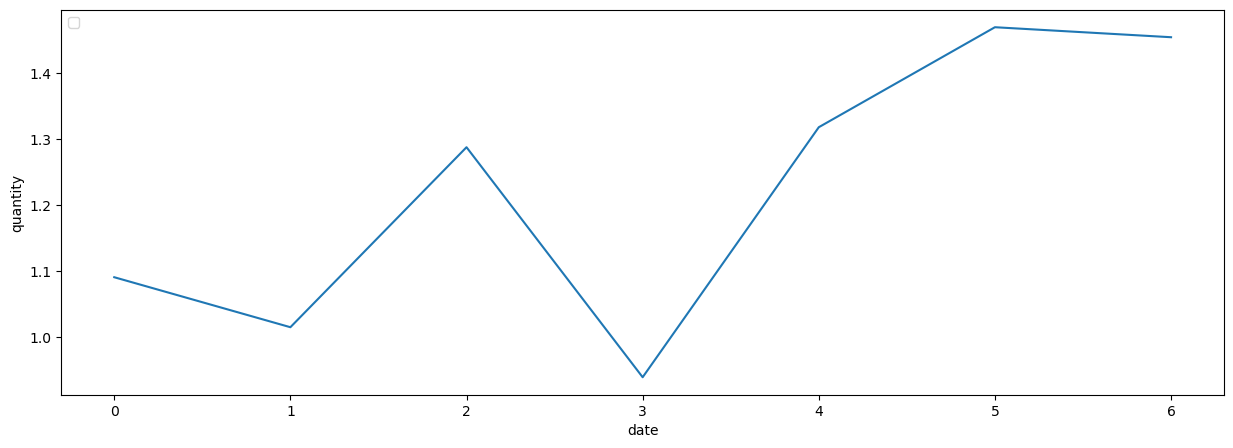

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


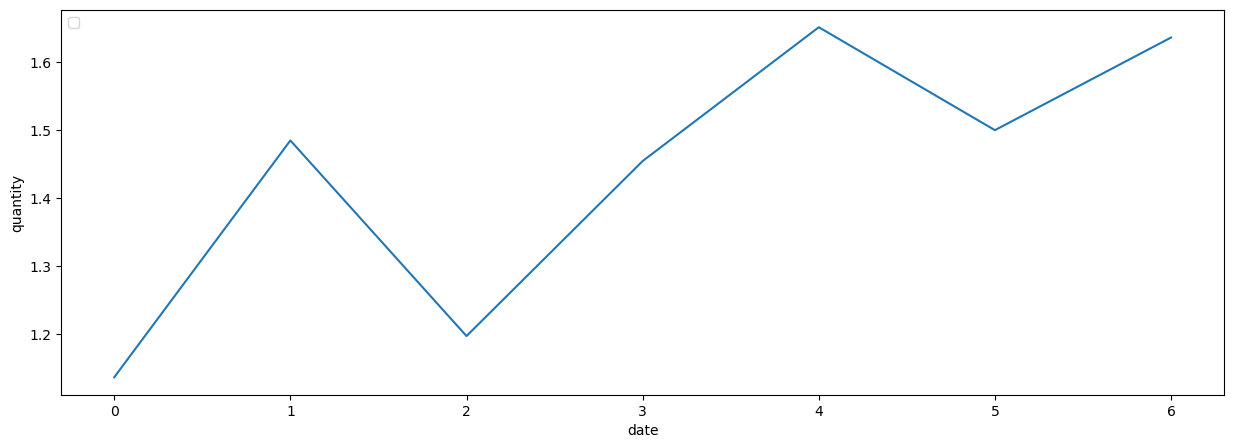

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


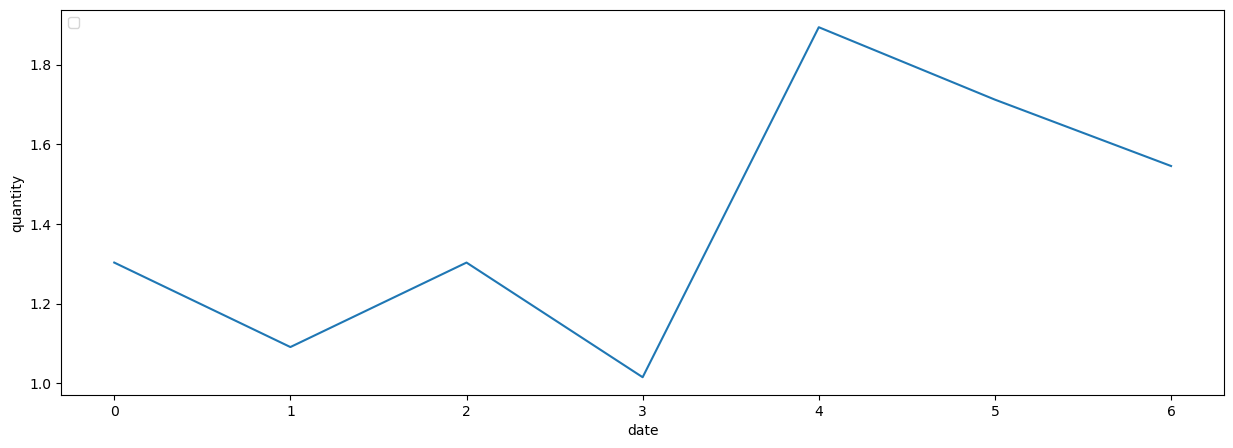

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


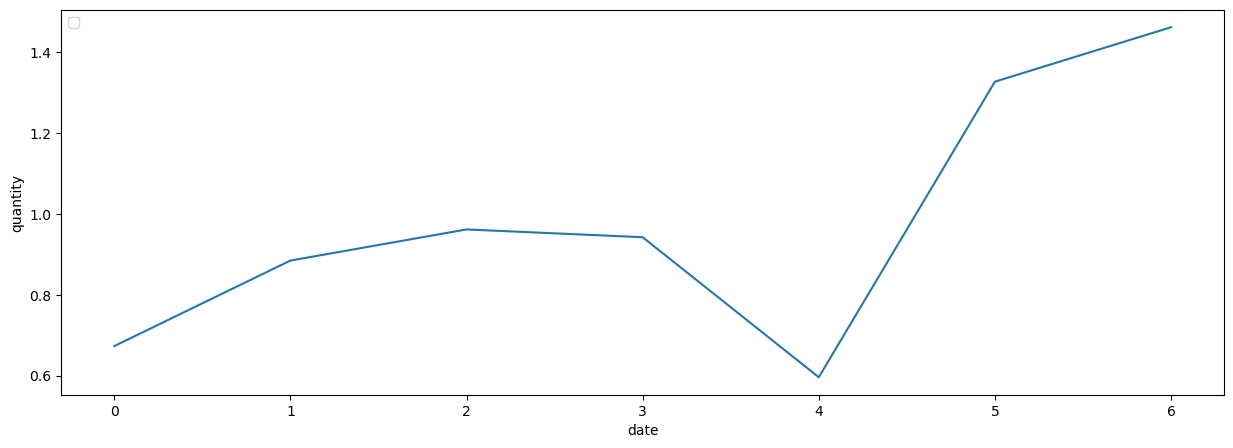

In [8]:
# 对于每个store, sku进行5周内统计
def get_week_average(data_sales, store_id, sku_id):
    data_pick = data_sales[(data_sales['store_id'] == store_id) & (data_sales['sku_id'] == sku_id)]
    data_pick = data_pick.drop(['store_id', 'sku_id'], axis=1)
    # 生成从最小日期到2023-08-31的dataframe
    data_pick = data_pick.set_index('date')
    data_pick = data_pick.reindex(pd.date_range(start=data_pick.index.min(), end='2023-08-31'))
    data_pick = data_pick.fillna(0)
    # 从后往前按照周统计
    data_pick = data_pick.iloc[data_pick.shape[0] - data_pick.shape[0] // 7 * 7:]
    # 统计每周相同星期几的平均值
    data_pick['week'] = data_pick.index.dayofweek
    data_pick = data_pick.groupby('week').mean()
    # 画图
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(111)
    ax1.plot(data_pick.index, data_pick['quantity'])
    ax1.set_ylabel('quantity')
    ax1.set_xlabel('date')
    plt.legend(loc='upper left')
    plt.show()

for i in range(1, 6):
    get_week_average(data_sales_nochannel, i, 1)